<img align="right" width="30%"  src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Thomas_Bayes.gif">

# Crash Intro to Bayesian Statistics

### Erik Tollerud
[Space Telescope Science Institute](https://www.stsci.edu)


# What is Bayesian Statistics?



A philosophical interpretation of the concept of probability, based on application of Bayes' Theorem.

# So then what is probability?

A "feeling" that humans and other animals have probably always had: "Will the sun come up tomorrow, or will today be the day it's [eaten by a frog](https://www.exploratorium.edu/eclipse/eclipse-stories-from-around-the-world)?". High probability it will come up.

A mathematical formalism, traditionally represented using the **Kolmogorov Probability Axioms**.  For a strict definition, see the [all-knowing Wikipedia](https://en.wikipedia.org/wiki/Probability_axioms).  But to summarize:


1. Probabilities are positive real numbers.
2. Probabilities of all the possibilities add up to 1.
3. If two events are mutually exclusive, the probability of one or the other is the sum if their individual probabilties.  I.e., $P(A \cup B) = P(A) + P(B)$

An important provable corollary: If they are *not* mutually exclusive: $P(A \cup B) = P(A) + P(B) - P(A \cap B)$, from which you can conclude $P(A \cap B) = P(B \cap A)$.

(cheat sheat: $\cup=$ "or", $\cap=$ "and")

## Conditional Probability

Conditional probabilty is not an axiom or proof, but a *definition*.  Read as "the probability of A given B":

$P(A|B) \equiv \frac{P(A \cap B)}{P(B)}$

or more intuitively (to me):

$P(A \cap B) = P(A|B)P(B)$

Because that makes it clear that if A and B are independent:

$P(A|B) = P(A)$

and thus

$P(A \cap B) = P(A)P(B)$


Aside:  apparently you can re-cast the axioms using this result in place of 3.  That's probably more natural in some ways? But... Tradition! *(they didn't even ask permission!)*

## Graphical Representations

It turns out there's a close correspondence between these axioms and the geometry of combining areas. This is the key principle behind the abstract concept of "Probability spaces" which is a sub-topic of the even more abstract mathematical topic "Measure Theory".  This which allows generalization of all of the concepts here from 2-D to N-D, but also uses highly specific mathematical terminology which is powerful but also *intensely* boring if you just want applications, so we'll stick to the intuitive 2D versions here.

* Axiom 1 is simply "areas are not negative"
* Axiom 2 is "the colored areas shown must all sum up to 1"
* Axiom 3 is "areas with no overlap add together" (see silly version below)

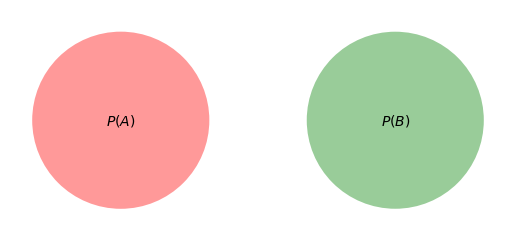

In [1]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

subset_label_formatter_map = {1:'$P(A)$',
                          .999:'$P(B)$',
                          0:r'$P(A  \cap B)$'}
subset_label_formatter = lambda x: subset_label_formatter_map[x]


venn = venn2(tuple(subset_label_formatter_map.keys()), None, subset_label_formatter=subset_label_formatter)

The following is then manifestly apparent: $P(A \cup B) = P(A) + P(B) - P(A \cap B)$

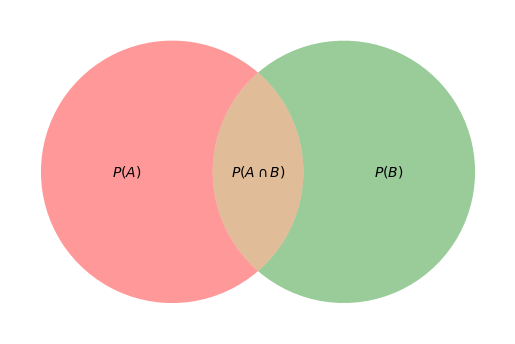

In [2]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

subset_label_formatter_map = {1:'$P(A)$',
                          .999:'$P(B)$',
                          .3:r'$P(A  \cap B)$'}
subset_label_formatter = lambda x: subset_label_formatter_map[x]


venn = venn2(tuple(subset_label_formatter_map.keys()), None, subset_label_formatter=subset_label_formatter)

Conditional probability: $P(A|B) \equiv \frac{P(A \cap B)}{P(B)}$ 

can also be thought of as "how much is in A if B is definitely true"

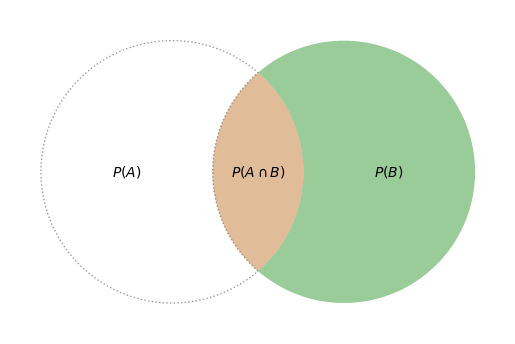

In [3]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

subset_label_formatter_map = {1:'$P(A)$',
                          .999:'$P(B)$',
                          .3:r'$P(A  \cap B)$'}
subset_label_formatter = lambda x: subset_label_formatter_map[x]

venn = venn2(tuple(subset_label_formatter_map.keys()), None, 
             subset_label_formatter=subset_label_formatter)

venn.patches[0].set_facecolor((1,1,1))
venn.patches[0].set_linestyle(':')
venn.patches[0].set_edgecolor('k')

Remember: the *colored* areas have to sum to 1.

# Bayes' Theorem

So then where does Bayes come in?  When you want to link a conditional probability to the "reversed" version:

$P(A|B) \stackrel{?}{=} {\rm something} P(B|A)$

Intuition says they are connected *somehow*.  But how?

That connection comes via a surprisingly simple proof from the axioms:

$P(A|B) P(B) = P(A \cap B)$, $P(B|A) P(A) = P(B \cap A)$, but the $\cap$'s have to be equal, so:

$P(A|B) P(B) = P(B|A) P(A)$

$P(A|B) = P(B|A) \frac{P(A)}{P(B)}$

And the that is Bayes' Theorem (or "Law" or "Rule" since it's provable from the axioms).

# Bayesian Terminology


$\color{red}{P({\rm Hypothesis}|{\rm Data})} = \color{green}{P({\rm Data}|{\rm Hypothesis})} \frac{\color{blue}{P({\rm Hypothesis})}}{\color{magenta}{P({\rm Data})}}$

<font color='red'>Posterior Probability</font><br>
<font color='green'>Likelihood</font><br>
<font color='blue'>Prior Probability</font><br>
<font color='magenta'>Marginal Likelihood or "Model Evidence"</font>


# So what's the big deal?

It's all in what you do with this.  If we do a re-labeling and a more practical addition, we start seeing the relevance for science:

$P({\rm Hypothesis}|{\rm Data, O}) = P({\rm Data}|{\rm Hypothesis, O}) \frac{P({\rm Hypothesis|O})}{P({\rm Data}|{\rm O})}$

(where ${\rm O}=$"Everything Else you know")

That is, Bayes' Law tells you how do update your scientific beliefs when faced with new data.  Key point: you can't ignore $P({\rm Hypothesis})$! Thus "priors". In this construct, the value of probability is "degree of certainty".

Interpreted that way, Bayes' Rule gives a guide for infering reality based on data.  Hence "Bayesian Inference".

## Bayes Example

While most practical scientific problems require more detailed analysis (see later), some respond *directly* to Bayes' Theorem. For example:

Do I actually  have COVID if I tested positive, but there's a non-zero false positive rate?

$P(C|+)= 1 - P( nC | +) = 1 - P(+ | nC) \frac{P(nC)}{P(+)}$

Take a moment to consider this. How does this help me decide what to do with a low but non-zero false-positive rate?

In [4]:
pos_no_covid = .01
prior_no_covid = .5
local_positive_test_rate = .05

1 - pos_no_covid * prior_no_covid / local_positive_test_rate

0.9

* If the false positive rate is low, I should stay home for a while.

In [5]:
pos_no_covid = .05

1 - pos_no_covid * prior_no_covid / local_positive_test_rate

0.5

In [6]:
local_positive_test_rate = .2

1 - pos_no_covid * prior_no_covid / local_positive_test_rate

0.875

* If the false positive rate is higher, I should take a close look at the statistics in the wider population... but also my symptoms!

### Exercise: how can the following be true?

In [7]:
pos_no_covid = .2
prior_no_covid = .5
local_positive_test_rate = .05

1 - pos_no_covid * prior_no_covid / local_positive_test_rate

-1.0

Answer: the local positivity rate can never be lower than the no-covid positivity rate! (Or the model is wrong...)

## Contrast with Frequentism

Bayesian statistics is often contrasted with frequentist statistics.  That's not really fair.  They are really very different applications of a set of mathematical laws: frequentism is applying the same rules, but treating the probability as a proportion of repeated events (with an implied concept that "repeated events" is a meaningful construct).  Sometimes that looks similar to the Bayesian approach, sometimes it doesn't. Both have uses, but in astro (maybe most science?), the Bayesian approach is often closer to what we are doing in the *big picture*.

The original "practical" application of frequentist statistics was improving Guiness beer ([seriously!](https://en.wikipedia.org/wiki/Student%27s_t-test)). For a situation where you actually want to do repeated experiments, this can be much simpler to think about.  Similar for classic "dice rolling" problems, since you can actually roll real, physical dice! It's also a lot easier to do calculations this way without computers.

In astronomy, by contrast, we don't get to do repeated experiments.  There's only one universe! (Or... your simulations  are really expensive...)  That makes Bayesian inference a more powerful tool for us.

For more on this, see an excellent series of posts by [Jake Vanderplas](http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/).

# Blah, Blah, Blah.  I have numbers and I want to fit them to something.  Tell me what to do!

Well too bad.  We have to do one more exposition.

$P(Model | Data) = P(Data | Model) \frac{P(Model)}{P(Data)}$

But a "model" isn't a thing we fit on it's own. We need the model *parameters*, which we collectively call $\Theta$ (Why that greek letter? Theta's a good question, I don't know...).  So we apply Bayes' Theorem to *that* under the assumption that the particular model in question is true:


$P(\Theta| D, M) = P(D| \Theta, M) \frac{P(\Theta|M)}{P(D | M)}$

So if we want the posterior, the right hand side is then things we can write down for a real, live data set: 

## Likelihood


$P(\Theta| D, M) = \color{green}{P(D| \Theta, M)} \frac{P(\Theta|M)}{P(D | M)}$

The Likelihood is the same kind of "likelihood function" you've likely (get it?) encountered before: the probability of a *specific* data value given a specific parameter value and your assumed model. It has a fixed value for the *data*, whereas the parameter values are to be though of as *variables* (philisophically distinct from the frequentist approach, where the data have to be "draws" from a distribution).

## Prior


$P(\Theta| D, M) = P(D| \Theta, M) \frac{\color{blue}{P(\Theta|M)}}{P(D | M)}$

The prior term encapsulates whatever you knew before the experiment: maybe you think this is nothing, but "nothing" is a tricky concept, as numbers have a way of imposing their *own* meaning.  Alternatively, you might know the right order-of-magnitude or know something like "it can't be negative".  Put it in here as a probability distribution!

## Evidence

a.k.a. the Marginal Likelihood

$P(\Theta| D, M) = P(D| \Theta, M) \frac{P(\Theta|M)}{\color{magenta}{P(D | M)}}$

In the parameter inference formulation, the good news is that we don't worry too much about this term: it's basically a "normalizing constant" because the posterior has to be a probability distribution so there's a free parameter to ensure it integrates to 1.

# Enough already.  Lets do something!

Ok, ok. Do these (in my recommended order, although you probably don't have to):

1. [Fitting a gaussian distribution](Session%201%20-%20Gaussian%20Examples.ipynb)
2. [The notebook on how I decided 3 sessions is the "right" number](bayesian%20session%20counts.ipynb) - this ise a bit more terse than the one above, but reflects a genuine decision question - the data are from a survey of how many sessions is good for a Bayesian intro, but the answer is presented as a Bayesian inference problem.
3. [Fitting a line to data using emcee](https://emcee.readthedocs.io/en/stable/tutorials/line/) - note you will need [emcee](https://emcee.readthedocs.io/en/stable/) installed to try this one out. I also strongly suggest instead of downloading the notebook, you read the linked page and type the code into your own notebook, exploring as you do.
4. Write your own MCMC! If you want a step-by-step guide, there's a great one [here](https://towardsdatascience.com/from-scratch-bayesian-inference-markov-chain-monte-carlo-and-metropolis-hastings-in-python-ef21a29e25a).  But you may learn more by instead using a Gaussian data set from #1 with a prose description of MCMC using the Metropolis-Hastings algorithm. Not to sound like a broken record, but [wikipedia may be your friend here](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm).

## Additional Resources

Note that this was the barest of bare introductions to Bayesian Inference. If you're looking for something more complete, there are piles of other places to look.  But if you want some of my recommendations:

1. [Jayne's "Probability Theory: The Logic of Science"](https://bayes.wustl.edu/etj/prob/book.pdf)
1. [The Orange Book: "Statistics, Data Mining, and Machine Learning in Astronomy"](https://www.amazon.com/Statistics-Mining-Machine-Learning-Astronomy/dp/0691151687)
1. [A zillion resources on the internet, choose based on your learning style](https://lmgtfy.com/?q=introduction+to+bayesian+statistics)
1. Only partly tongue-in-cheek... ["Bayesian Probability for Babies"](https://www.amazon.com/Bayesian-Probability-Babies-Chris-Ferrie/dp/1492680796)
 